In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import tensorflow as tf

In [36]:
#importing relevant data

opioid_va= pd.read_csv('C:/Users/m8rqu/Documents/Data BootCamp/Opoid/Resources/va_drug_2015.csv')
census_va = pd.read_csv('C:/Users/m8rqu/Documents/Data BootCamp/Opoid/Resources/percentage.csv')

In [37]:
opioid_va

,Counties,DOSAGE_UNIT
0,ACCOMACK,802000.0
1,ALBEMARLE,2400430.0
2,ALEXANDRIA CITY,1891010.0
3,ALLEGHANY,612500.0
4,AMELIA,231320.0
...,...,...
120,WESTMORELAND,271460.0
121,WINCHESTER CITY,1872140.0
122,WISE,4954510.0
123,WYTHE,1866770.0


In [38]:
census_va

,Less than 9th grade,"9th to 12th grade, no diploma","Some college, no degree",Associate's degree,Bachelor's degree,Graduate or professional degree,Population 25 to 34 years,Population 35 to 44 years,Population 45 to 64 years,Population 65 years and over,...,Black alone High school graduate or higher,Black alone Bachelor's degree or higher,Asian alone,Asian aloneÂ High school graduate or higher,Asian aloneÂ Bachelor's degree or higher,Hispanic or Latino Origin,Hispanic or Latino OriginÂ High school graduate or higher,Hispanic or Latino OriginÂ Bachelor's degree or higher,Counties,Total Population
0,0.290864,0.014401,0.095211,0.144526,0.036726,1.607857,0.045489,0.061587,0.297521,0.121182,...,0.614287,0.403396,1.352428,1.285950,0.744051,0.153968,0.123039,0.018703,ALBEMARLE,83857
1,0.246805,0.014325,0.035826,0.048016,0.148639,2.409671,0.114639,0.064349,0.224124,0.078519,...,0.712594,0.304722,1.785580,1.721217,1.425428,0.211541,0.178693,0.092380,ARLINGTON,189157
2,0.134518,0.042002,0.042205,0.045489,0.004823,1.216642,0.050538,0.116631,0.236545,0.086539,...,0.511446,0.324035,1.138639,0.998664,0.257263,0.000000,0.000000,0.000000,AUGUSTA,59674
3,0.081341,0.005786,0.031893,0.034323,0.009339,0.786465,0.039547,0.074600,0.153442,0.078069,...,0.356150,0.213620,0.709954,0.604429,0.189380,0.061245,0.055557,0.014465,BEDFORD,61793
4,0.701506,0.075241,0.225744,0.323174,0.077346,5.053345,0.181750,0.237066,1.094373,0.401064,...,2.111242,1.011797,3.618703,3.345364,1.425654,1.061995,0.978195,0.341107,CHESTERFIELD,254163
5,1.347695,0.160225,0.313134,0.571511,0.302826,10.879575,0.470185,0.395486,1.455088,0.578477,...,4.415751,1.912437,6.931003,6.548198,4.463739,0.998525,0.912788,0.434444,FAIRFAX,870655
6,0.110359,0.012499,0.049745,0.034167,0.013948,1.080245,0.026061,0.058281,0.226627,0.075829,...,0.474878,0.240666,0.940790,0.879792,0.327522,0.092245,0.073927,0.015193,FAUQUIER,52583
7,0.085850,0.008061,0.033213,0.042173,0.002401,0.816308,0.031289,0.063773,0.150240,0.073954,...,0.355925,0.192905,0.748223,0.667486,0.205896,0.000000,0.000000,0.000000,FREDERICK,64239
8,0.201698,0.025224,0.058576,0.096298,0.021601,1.609759,0.029843,0.091136,0.331914,0.148738,...,0.708457,0.369297,1.393026,1.309612,0.503657,0.160082,0.132163,0.034620,HANOVER,80003
9,0.362947,0.055810,0.105061,0.146673,0.055403,3.143373,0.084782,0.170702,0.643878,0.210614,...,1.222594,0.643387,1.914670,1.816827,0.951409,0.866654,0.755891,0.252268,HENRICO,249671


In [39]:
merge_va = pd.merge(census_va,opioid_va,how = 'left', on =['Counties'])
merge_va

,Less than 9th grade,"9th to 12th grade, no diploma","Some college, no degree",Associate's degree,Bachelor's degree,Graduate or professional degree,Population 25 to 34 years,Population 35 to 44 years,Population 45 to 64 years,Population 65 years and over,...,Black alone Bachelor's degree or higher,Asian alone,Asian aloneÂ High school graduate or higher,Asian aloneÂ Bachelor's degree or higher,Hispanic or Latino Origin,Hispanic or Latino OriginÂ High school graduate or higher,Hispanic or Latino OriginÂ Bachelor's degree or higher,Counties,Total Population,DOSAGE_UNIT
0,0.290864,0.014401,0.095211,0.144526,0.036726,1.607857,0.045489,0.061587,0.297521,0.121182,...,0.403396,1.352428,1.285950,0.744051,0.153968,0.123039,0.018703,ALBEMARLE,83857,2400430.0
1,0.246805,0.014325,0.035826,0.048016,0.148639,2.409671,0.114639,0.064349,0.224124,0.078519,...,0.304722,1.785580,1.721217,1.425428,0.211541,0.178693,0.092380,ARLINGTON,189157,2084590.0
2,0.134518,0.042002,0.042205,0.045489,0.004823,1.216642,0.050538,0.116631,0.236545,0.086539,...,0.324035,1.138639,0.998664,0.257263,0.000000,0.000000,0.000000,AUGUSTA,59674,1255860.0
3,0.081341,0.005786,0.031893,0.034323,0.009339,0.786465,0.039547,0.074600,0.153442,0.078069,...,0.213620,0.709954,0.604429,0.189380,0.061245,0.055557,0.014465,BEDFORD,61793,1468560.0
4,0.701506,0.075241,0.225744,0.323174,0.077346,5.053345,0.181750,0.237066,1.094373,0.401064,...,1.011797,3.618703,3.345364,1.425654,1.061995,0.978195,0.341107,CHESTERFIELD,254163,9826730.0
5,1.347695,0.160225,0.313134,0.571511,0.302826,10.879575,0.470185,0.395486,1.455088,0.578477,...,1.912437,6.931003,6.548198,4.463739,0.998525,0.912788,0.434444,FAIRFAX,870655,14442280.0
6,0.110359,0.012499,0.049745,0.034167,0.013948,1.080245,0.026061,0.058281,0.226627,0.075829,...,0.240666,0.940790,0.879792,0.327522,0.092245,0.073927,0.015193,FAUQUIER,52583,1865840.0
7,0.085850,0.008061,0.033213,0.042173,0.002401,0.816308,0.031289,0.063773,0.150240,0.073954,...,0.192905,0.748223,0.667486,0.205896,0.000000,0.000000,0.000000,FREDERICK,64239,1851320.0
8,0.201698,0.025224,0.058576,0.096298,0.021601,1.609759,0.029843,0.091136,0.331914,0.148738,...,0.369297,1.393026,1.309612,0.503657,0.160082,0.132163,0.034620,HANOVER,80003,4738360.0
9,0.362947,0.055810,0.105061,0.146673,0.055403,3.143373,0.084782,0.170702,0.643878,0.210614,...,0.643387,1.914670,1.816827,0.951409,0.866654,0.755891,0.252268,HENRICO,249671,10513810.0


In [40]:
#Removing the nas
merge_va.dropna(inplace= True)


In [41]:
# merge_va['Population'] = merge_va['Population 18 to 24 years'] + merge_va['Population 25 years and over']
# merge_va

In [42]:
merge_va['Dosage_Per_Pop'] = merge_va['DOSAGE_UNIT']/merge_va['Total Population']
merge_va

,Less than 9th grade,"9th to 12th grade, no diploma","Some college, no degree",Associate's degree,Bachelor's degree,Graduate or professional degree,Population 25 to 34 years,Population 35 to 44 years,Population 45 to 64 years,Population 65 years and over,...,Asian alone,Asian aloneÂ High school graduate or higher,Asian aloneÂ Bachelor's degree or higher,Hispanic or Latino Origin,Hispanic or Latino OriginÂ High school graduate or higher,Hispanic or Latino OriginÂ Bachelor's degree or higher,Counties,Total Population,DOSAGE_UNIT,Dosage_Per_Pop
0,0.290864,0.014401,0.095211,0.144526,0.036726,1.607857,0.045489,0.061587,0.297521,0.121182,...,1.352428,1.285950,0.744051,0.153968,0.123039,0.018703,ALBEMARLE,83857,2400430.0,28.625279
1,0.246805,0.014325,0.035826,0.048016,0.148639,2.409671,0.114639,0.064349,0.224124,0.078519,...,1.785580,1.721217,1.425428,0.211541,0.178693,0.092380,ARLINGTON,189157,2084590.0,11.020422
2,0.134518,0.042002,0.042205,0.045489,0.004823,1.216642,0.050538,0.116631,0.236545,0.086539,...,1.138639,0.998664,0.257263,0.000000,0.000000,0.000000,AUGUSTA,59674,1255860.0,21.045346
3,0.081341,0.005786,0.031893,0.034323,0.009339,0.786465,0.039547,0.074600,0.153442,0.078069,...,0.709954,0.604429,0.189380,0.061245,0.055557,0.014465,BEDFORD,61793,1468560.0,23.765799
4,0.701506,0.075241,0.225744,0.323174,0.077346,5.053345,0.181750,0.237066,1.094373,0.401064,...,3.618703,3.345364,1.425654,1.061995,0.978195,0.341107,CHESTERFIELD,254163,9826730.0,38.663102
5,1.347695,0.160225,0.313134,0.571511,0.302826,10.879575,0.470185,0.395486,1.455088,0.578477,...,6.931003,6.548198,4.463739,0.998525,0.912788,0.434444,FAIRFAX,870655,14442280.0,16.587833
6,0.110359,0.012499,0.049745,0.034167,0.013948,1.080245,0.026061,0.058281,0.226627,0.075829,...,0.940790,0.879792,0.327522,0.092245,0.073927,0.015193,FAUQUIER,52583,1865840.0,35.483711
7,0.085850,0.008061,0.033213,0.042173,0.002401,0.816308,0.031289,0.063773,0.150240,0.073954,...,0.748223,0.667486,0.205896,0.000000,0.000000,0.000000,FREDERICK,64239,1851320.0,28.819253
8,0.201698,0.025224,0.058576,0.096298,0.021601,1.609759,0.029843,0.091136,0.331914,0.148738,...,1.393026,1.309612,0.503657,0.160082,0.132163,0.034620,HANOVER,80003,4738360.0,59.227279
9,0.362947,0.055810,0.105061,0.146673,0.055403,3.143373,0.084782,0.170702,0.643878,0.210614,...,1.914670,1.816827,0.951409,0.866654,0.755891,0.252268,HENRICO,249671,10513810.0,42.110658


In [43]:
merge_va['Dos_Parameter'] = merge_va['Dosage_Per_Pop'].apply(lambda x: 1 if x < 21 else 0)
merge_va

,Less than 9th grade,"9th to 12th grade, no diploma","Some college, no degree",Associate's degree,Bachelor's degree,Graduate or professional degree,Population 25 to 34 years,Population 35 to 44 years,Population 45 to 64 years,Population 65 years and over,...,Asian aloneÂ High school graduate or higher,Asian aloneÂ Bachelor's degree or higher,Hispanic or Latino Origin,Hispanic or Latino OriginÂ High school graduate or higher,Hispanic or Latino OriginÂ Bachelor's degree or higher,Counties,Total Population,DOSAGE_UNIT,Dosage_Per_Pop,Dos_Parameter
0,0.290864,0.014401,0.095211,0.144526,0.036726,1.607857,0.045489,0.061587,0.297521,0.121182,...,1.285950,0.744051,0.153968,0.123039,0.018703,ALBEMARLE,83857,2400430.0,28.625279,0
1,0.246805,0.014325,0.035826,0.048016,0.148639,2.409671,0.114639,0.064349,0.224124,0.078519,...,1.721217,1.425428,0.211541,0.178693,0.092380,ARLINGTON,189157,2084590.0,11.020422,1
2,0.134518,0.042002,0.042205,0.045489,0.004823,1.216642,0.050538,0.116631,0.236545,0.086539,...,0.998664,0.257263,0.000000,0.000000,0.000000,AUGUSTA,59674,1255860.0,21.045346,0
3,0.081341,0.005786,0.031893,0.034323,0.009339,0.786465,0.039547,0.074600,0.153442,0.078069,...,0.604429,0.189380,0.061245,0.055557,0.014465,BEDFORD,61793,1468560.0,23.765799,0
4,0.701506,0.075241,0.225744,0.323174,0.077346,5.053345,0.181750,0.237066,1.094373,0.401064,...,3.345364,1.425654,1.061995,0.978195,0.341107,CHESTERFIELD,254163,9826730.0,38.663102,0
5,1.347695,0.160225,0.313134,0.571511,0.302826,10.879575,0.470185,0.395486,1.455088,0.578477,...,6.548198,4.463739,0.998525,0.912788,0.434444,FAIRFAX,870655,14442280.0,16.587833,1
6,0.110359,0.012499,0.049745,0.034167,0.013948,1.080245,0.026061,0.058281,0.226627,0.075829,...,0.879792,0.327522,0.092245,0.073927,0.015193,FAUQUIER,52583,1865840.0,35.483711,0
7,0.085850,0.008061,0.033213,0.042173,0.002401,0.816308,0.031289,0.063773,0.150240,0.073954,...,0.667486,0.205896,0.000000,0.000000,0.000000,FREDERICK,64239,1851320.0,28.819253,0
8,0.201698,0.025224,0.058576,0.096298,0.021601,1.609759,0.029843,0.091136,0.331914,0.148738,...,1.309612,0.503657,0.160082,0.132163,0.034620,HANOVER,80003,4738360.0,59.227279,0
9,0.362947,0.055810,0.105061,0.146673,0.055403,3.143373,0.084782,0.170702,0.643878,0.210614,...,1.816827,0.951409,0.866654,0.755891,0.252268,HENRICO,249671,10513810.0,42.110658,0


In [44]:
#Separating the datasets

y = merge_va['Dos_Parameter']
X = merge_va.drop(columns = ['DOSAGE_UNIT','Counties','Dos_Parameter','Total Population','Dosage_Per_Pop'])

#Split training/test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [45]:
# Instantiate a StandardScaler instance
scaler = StandardScaler()

# Fit the training data to the standard scaler
X_scaler = scaler.fit(X_train)

# Transform the training data using the scaler
X_train_scaled = X_scaler.transform(X_train)

# Transform the testing data using the scaler
X_test_scaled = X_scaler.transform(X_test)

In [46]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver='lbfgs',
                                max_iter=200,
                                random_state=2)
classifier

LogisticRegression(max_iter=200, random_state=2)

In [47]:
classifier.fit(X_train, y_train)

LogisticRegression(max_iter=200, random_state=2)

In [48]:
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.9285714285714286
Testing Data Score: 0.6


In [49]:
predictions = classifier.predict(X_test)
results = pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)
results.head(10)

,Prediction,Actual
0,0,0
1,0,0
2,0,0
3,0,1
4,1,0


In [50]:
from sklearn.metrics import accuracy_score
# Display the accuracy score for the test dataset.
accuracy_score(y_test, predictions)

0.6

## Fitting the Random Forest Model

In [51]:
# Create a random forest classifier

from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=500, random_state=78)

In [52]:
# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

In [53]:
# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)

In [54]:
# Calculating the confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [55]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,3,1
Actual 1,1,0


Accuracy Score : 0.6
Classification Report
              precision    recall  f1-score   support

           0       0.75      0.75      0.75         4
           1       0.00      0.00      0.00         1

    accuracy                           0.60         5
   macro avg       0.38      0.38      0.38         5
weighted avg       0.60      0.60      0.60         5



## Feature Importance

In [56]:
# Random Forests in sklearn will automatically calculate feature importance
importances = rf_model.feature_importances_
# We can sort the features by their importance
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.1348436143404697, "Asian aloneÂ\xa0Bachelor's degree or higher"),
 (0.1219095432093336, 'Population 25 to 34 years'),
 (0.1157530799040233, 'White alone High school graduate or higher'),
 (0.06616135915227461, 'White alone'),
 (0.06462467496010474, 'Asian aloneÂ\xa0High school graduate or higher'),
 (0.0646033747291609, "Bachelor's degree"),
 (0.06423971071245706, "White alone Bachelor's degree or higher"),
 (0.06415736681984065, 'Graduate or professional degree'),
 (0.0578035013359961, 'Black alone'),
 (0.04957161713975132, 'Asian alone'),
 (0.04202994303623235,
  "Hispanic or Latino OriginÂ\xa0Bachelor's degree or higher"),
 (0.033203996097077866, 'Black alone High school graduate or higher'),
 (0.02676307096118417, 'Some college, no degree'),
 (0.01408805031446541, "Black alone Bachelor's degree or higher"),
 (0.013170326063407827, 'Less than 9th grade'),
 (0.012206812521277931, 'Population 65 years and over'),
 (0.012049077562704399, 'Population 45 to 64 years'),
 (0.0116567491

<AxesSubplot:title={'center':'Top 10 Feature Importances'}, ylabel='Feature'>

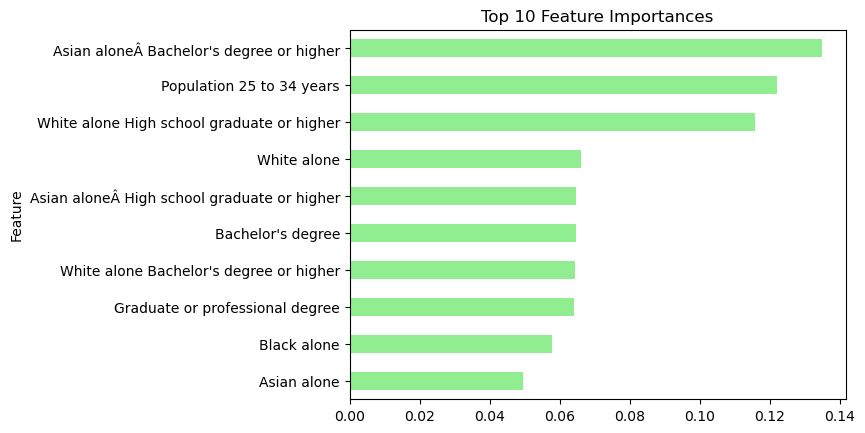

In [57]:
importances = rf_model.feature_importances_

# Sort the feature importances in descending order and select the top 5
top_5_features = sorted(zip(importances, X.columns), reverse=True)[:10]

# Create a DataFrame for visualization
importances_df = pd.DataFrame(top_5_features, columns=['Feature Importances', 'Feature'])
importances_df.set_index('Feature', inplace=True)

# Sort the DataFrame by 'Feature Importances' in ascending order
importances_sorted = importances_df.sort_values(by='Feature Importances', ascending=True)

# Visualize the top 5 features by importance
importances_sorted.plot(kind='barh', color='lightgreen', title='Top 10 Feature Importances', legend=False)

In [58]:
X.columns

Index(['Less than 9th grade', '9th to 12th grade, no diploma',
       'Some college, no degree', 'Associate's degree', 'Bachelor's degree',
       'Graduate or professional degree', 'Population 25 to 34 years',
       'Population 35 to 44 years', 'Population 45 to 64 years',
       'Population 65 years and over', 'White alone',
       'White alone High school graduate or higher',
       'White alone Bachelor's degree or higher', 'Black alone',
       'Black alone High school graduate or higher',
       'Black alone Bachelor's degree or higher', 'Asian alone',
       'Asian aloneÂ High school graduate or higher',
       'Asian aloneÂ Bachelor's degree or higher', 'Hispanic or Latino Origin',
       'Hispanic or Latino OriginÂ High school graduate or higher',
       'Hispanic or Latino OriginÂ Bachelor's degree or higher'],
      dtype='object')

<AxesSubplot:title={'center':'Top 10 Least Importances'}, ylabel='Feature'>

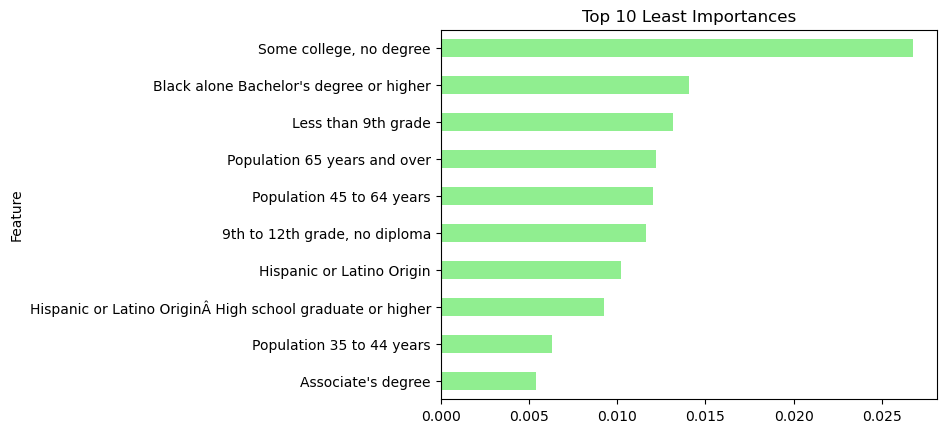

In [59]:
importances = rf_model.feature_importances_

# Sort the feature importances in descending order and select the top 5
top_5_features = sorted(zip(importances, X.columns), reverse=False)[:10]

# Create a DataFrame for visualization
importances_df = pd.DataFrame(top_5_features, columns=['Feature Importances', 'Feature'])
importances_df.set_index('Feature', inplace=True)

# Sort the DataFrame by 'Feature Importances' in ascending order
importances_sorted = importances_df.sort_values(by='Feature Importances', ascending=True)

# Visualize the top 5 features by importance
importances_sorted.plot(kind='barh', color='lightgreen', title='Top 10 Least Importances', legend=False)

In [60]:
# https://www.statology.org/how-to-calculate-vif-in-python/

from statsmodels.stats.outliers_influence import variance_inflation_factor


vif_data = pd.DataFrame()
vif_data["variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

                                             variable  VIF
0                                 Less than 9th grade  inf
1                       9th to 12th grade, no diploma  inf
2                             Some college, no degree  inf
3                                  Associate's degree  inf
4                                   Bachelor's degree  inf
5                     Graduate or professional degree  inf
6                           Population 25 to 34 years  inf
7                           Population 35 to 44 years  inf
8                           Population 45 to 64 years  inf
9                        Population 65 years and over  inf
10                                        White alone  inf
11         White alone High school graduate or higher  inf
12            White alone Bachelor's degree or higher  inf
13                                        Black alone  inf
14         Black alone High school graduate or higher  inf
15            Black alone Bachelor's degree or higher  i

c:\Users\m8rqu\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


In [61]:
Y = merge_va['Dosage_Per_Pop']
xs = X[["White alone","Black alone","Hispanic or Latino Origin","Asian alone"]]

In [62]:
# https://www.statology.org/how-to-calculate-vif-in-python/

from statsmodels.stats.outliers_influence import variance_inflation_factor


vif_data = pd.DataFrame()
vif_data["variable"] = xs.columns
vif_data["VIF"] = [variance_inflation_factor(xs.values, i) for i in range(xs.shape[1])]

print(vif_data)

                    variable         VIF
0                White alone  116.957440
1                Black alone  221.869643
2  Hispanic or Latino Origin    2.833714
3                Asian alone   42.885467


In [63]:
import statsmodels.api as sm

X = sm.add_constant(X)

# Fit the multiple linear regression model
model = sm.OLS(Y, X).fit()

# Print the summary statistics of the regression model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         Dosage_Per_Pop   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Sun, 01 Oct 2023   Prob (F-statistic):                nan
Time:                        20:56:59   Log-Likelihood:                 500.41
No. Observations:                  19   AIC:                            -962.8
Df Residuals:                       0   BIC:                            -944.9
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                                                coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------

c:\Users\m8rqu\anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
c:\Users\m8rqu\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1749: RuntimeWarning: divide by zero encountered in divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
c:\Users\m8rqu\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1749: RuntimeWarning: invalid value encountered in scalar multiply
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
c:\Users\m8rqu\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1671: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
